<a href="https://colab.research.google.com/github/CeeCeeOkeke/PortfolioProject/blob/main/Car_Price_Prediction_Certified_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [2]:
# loading the csv into our our dataframe
car_details = pd.read_csv("/content/CAR DETAILS FROM CAR DEKHO.csv")

In [3]:
#car the information about the car dataset
car_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [4]:
# printing the first 5 rows and columns of our dataset
car_details.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
# checking if there is missing values
car_details.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [6]:
# checking the total number of rows and columns of our dataset
car_details.shape

(4340, 8)

In [7]:
#looking at the statistical measures of our dataset
car_details.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


<Axes: xlabel='fuel', ylabel='count'>

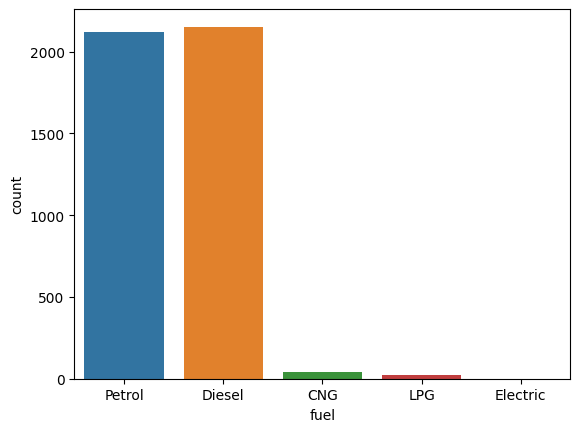

In [8]:
sns.countplot(x='fuel', data=car_details)

<Axes: xlabel='transmission', ylabel='count'>

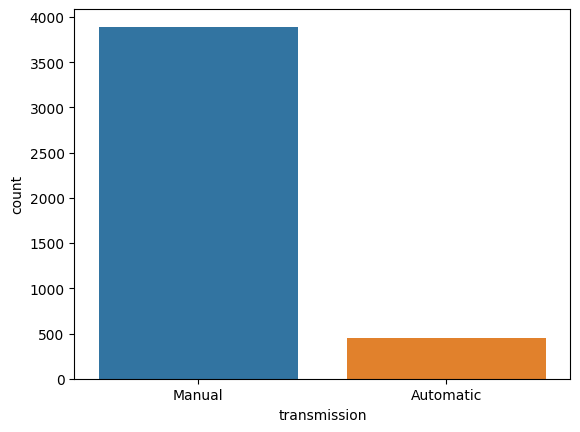

In [9]:
sns.countplot(x='transmission', data=car_details)

<Axes: xlabel='owner', ylabel='count'>

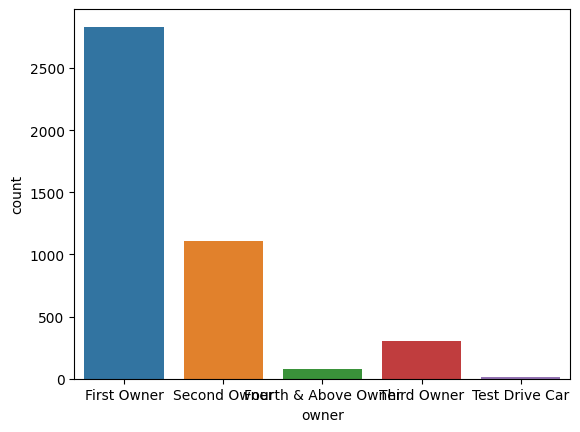

In [10]:
sns.countplot(x='owner', data=car_details)

In [11]:
# Checking the categorical data
car_details.value_counts('transmission')

transmission
Manual       3892
Automatic     448
dtype: int64

In [12]:
correlation = car_details.corr()

<ipython-input-12-4924e982d012>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = car_details.corr()


<Axes: >

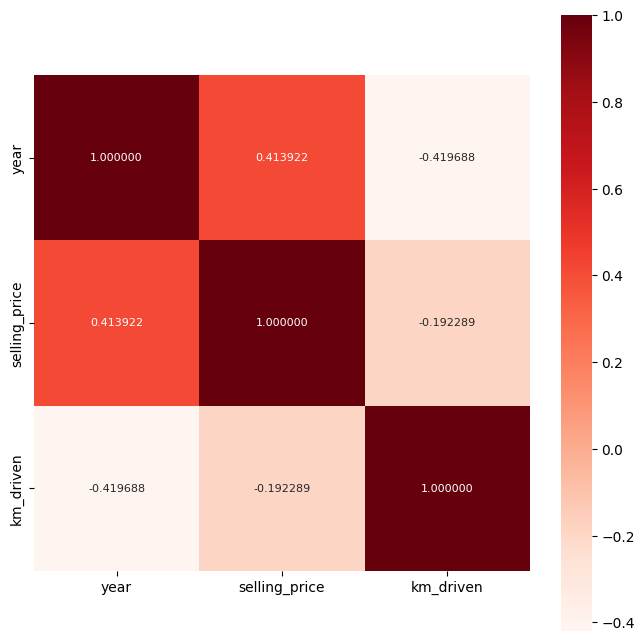

In [13]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt= '1f', annot=True, annot_kws={'size' : 8}, cmap ='Reds' )

In [14]:
car_details.value_counts('owner')

owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
dtype: int64

In [15]:
car_details.value_counts('fuel')

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
dtype: int64

LABEL ENCODING
  
   Using a direct function



In [23]:
#making a list of Labels i want to Encode
list1 = ['name','fuel','seller_type','transmission','owner']
le = LabelEncoder()
for values in list1:
 car_details[values] = le.fit_transform(car_details[values])


In [25]:
car_details.head(30)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,775,2007,60000,70000,4,1,1,0
1,1041,2007,135000,50000,4,1,1,0
2,505,2012,600000,100000,1,1,1,0
3,118,2017,250000,46000,4,1,1,0
4,279,2014,450000,141000,1,1,1,2
5,812,2007,140000,125000,4,1,1,0
6,545,2016,550000,25000,4,1,1,0
7,1256,2014,240000,60000,4,1,1,2
8,390,2015,850000,25000,4,1,1,0
9,834,2017,365000,78000,0,1,1,0


In [26]:
#Split data
X = car_details.drop('selling_price', axis=1)
Y = car_details['selling_price']

In [27]:
print(X)
print(Y)

      name  year  km_driven  fuel  seller_type  transmission  owner
0      775  2007      70000     4            1             1      0
1     1041  2007      50000     4            1             1      0
2      505  2012     100000     1            1             1      0
3      118  2017      46000     4            1             1      0
4      279  2014     141000     1            1             1      2
...    ...   ...        ...   ...          ...           ...    ...
4335   602  2014      80000     1            1             1      2
4336   601  2014      80000     1            1             1      2
4337   777  2009      83000     4            1             1      2
4338   381  2016      90000     1            1             1      0
4339  1154  2016      40000     4            1             1      0

[4340 rows x 7 columns]
0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    2

In [28]:
# spltting test and training of data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3, random_state=2)

In [29]:
print(X.shape,X_train.shape, Y_train.shape )

(4340, 7) (3038, 7) (3038,)


In [58]:
# Model Training
model = RandomForestClassifier()

In [59]:
model.fit(X,Y)

RandomForestClassifier()

In [60]:
training_model_prediction = model.predict(X_train)

In [62]:
error_score = accuracy_score(Y_train, training_model_prediction)
print(f'Accuracy : {error_score}')

Accuracy : 0.9871626069782752


In [51]:
testing_model = model.predict(X_test)

In [52]:
error2 = accuracy_score(Y_test, testing_model)

In [64]:
print(f' Accuracy on testing model is : {error2} ')

 Accuracy on testing model is : 0.48806850065090435 


In [67]:
input_data = (279,2014,141000,1,1,1,2)
#changing the input_data to a numpy_array
input_data_as_numpy_array = np.asarray(input_data)

#reshaping the array
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
prediction = model.predict(input_data_reshaped)
print(prediction)

[450000]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
